# This notebook introduces the code used to optimize the French keyboard. 

It covers the following uses: 
- Set up optimization instances and run the optimization.
- Evaluate and visualize computed or hand-made mappings. 
- Modify and compare mappings. 
- What you need to compute your own scenario or language

In [4]:
import sys
!{sys.executable} -m pip install gurobipy


     |████████████████████████████████| 7.4 MB 2.4 MB/s eta 0:00:01


In [5]:
# -*- coding: utf-8 -*-
from objectives import *  
from optimize_reform import * 
from read_input import *
import os


%matplotlib inline
PYTHONIOENCODING="utf-8"


## Define the scenario
Here you can define: 
- the weights for each objective, <code>w_p, w_a, w_f, w_e</code>, they should sum up to 1
- the <code>corpus_weights</code> which are weights for different text corpora (if any), they should sum up to 1
- the <code>char_set</code> that contains the to-be-mapped characters
- the <code>scenario</code> that defines the characters that are fixed (from the character set) and where they are positioned

The example uses a very small test set. The necessary files for the optimization scenario used to optimize the French keyboard standard are also available in the <code>input</code> folder. 
To create your own scenarios or charactersets see the description below

In [7]:
# Define the weights for:
# w_p: Performance
# w_a: Association
# w_f: Familiarity
# w_e: Ergonomics
w_p, w_a, w_f, w_e = [0.25,0.25,0.25,0.25]

# Define weights for the frequency distributions coming from different corpora. If none are provided, they are all weighted equally
# the key used in the dict is searched for in the filename of the frequency file 
# and thus should uniquely identify the file in "input/frequencies/"
corpus_weights = {"formal":0.5, "twitter":0.3, "code":0.2}

# see input file "input/fixed/fixed_XXXX.txt"
scenario = "scenarioTEST"
# see input file "input/characters/characters_XXXX.txt"
char_set = "setTEST"
# Define the scenario (also done by the optimize function below, but needed when just plotting or evaluating mappings)
set_scenario_files(scenario, char_set)

## Optimize 
Run the <code> optimize </code> method to optimize the keyboard. 
It returns the optimization model and the optimized mapping.
Intermediate solutions are stored in the folder <code> mappings </code>
They can later be read in using the method <code> get_mapping(path_to_mapping) </code> which returns a dictionary of characters to keyslots

Note, this is only done in the notebook for demonstration purposes. The following code should be executed on a powerful server or cluster. Depending on the input data computation of an acceptible solution can take several days.

Create optimization lp file
Adding fixation constraints
Adding coherence constraints
Adding capitalization constraints
filename: scenarioTESTsetTEST_reform_constrained
directory: mappings/scenarioTESTsetTEST/
Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-01
Read LP format model from file mappings/reformulations/scenarioTESTsetTEST_reform_constrained.lp
Reading time = 0.21 seconds
: 17890 rows, 33800 columns, 371651 nonzeros
Set parameter NodefileStart to value 0.5
optimizing...
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 17890 rows, 33800 columns and 371651 nonzeros
Model fingerprint: 0x1c3ec0d8
Variable types: 16900 continuous, 16900 integer (16900 binary)
Coefficient statistics:
  Matrix range     [2e-04, 2e+00]
  Objective range  [2e-07, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e-01, 2e+00]
Found incumbe

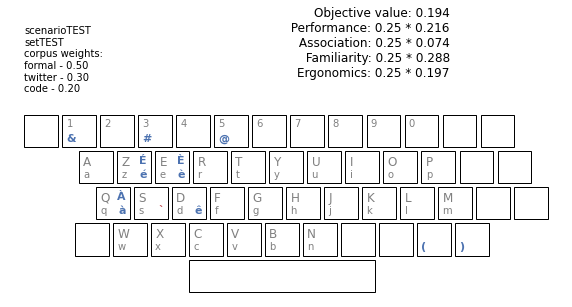

In [8]:
# optimize the keyboard
model = optimize(w_p, w_a, w_f, w_e, corpus_weights, scenario, char_set)

### If you have stopped the optimization before it terminated:
The third last column (or so) in the console output gives you the Gap between the score of the current best solution and the global optimum. 

Then run the following code to:
- put the best found mapping in a human readable format that can also be easily modified, and
- produce the plot with objectives

Output will be stored in the <code> mappings </code> folder

objective:  0.19367195


{'#': 'E03',
 '&': 'E01',
 '(': 'B09',
 ')': 'B10',
 '@': 'E05',
 'À': 'C01_Alt_Shift',
 'È': 'D03_Alt_Shift',
 'É': 'D02_Alt_Shift',
 'à': 'C01_Alt',
 'è': 'D03_Alt',
 'é': 'D02_Alt',
 'ê': 'C03_Alt',
 'ˋd': 'C02_Alt'}

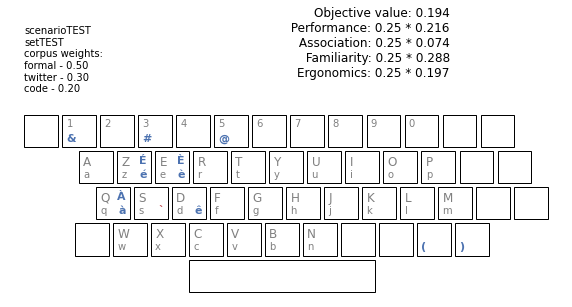

In [9]:
evaluate_optimized_reformulation(scenario, char_set,w_p, w_a, w_f, w_e, corpus_weights)

### Evaluate and plot any given mapping:
Given a mapping we can use 

<code>plot_mapping(path_to_mapping, plotname=path_to_mapping+".png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, 
             corpus_weights=corpus_weights</code> 

to compute the values for each objective and visualize the mapping. The plotname is optional. If provided, it will save the visualization of the mapping.

The mapping can be given directly as a dict of characters to keyslots or in form of a file path, either to a .txt file for which the format is 
"letter key"
or to a .mst file as created by the optimization process. 

Note: 
- plotting is only available for AZERTY-like layouts where the normal letters are arranged as on AZERTY
- the scenario and characterset must match the mapping. Characters that do not appear in the defined  characterset are filtered out for evaluation. 

To only evaluate the cost terms of the mapping, without viusalizing it, you have to first read in the mapping using:

<code> mapping = create_map_from_txt(path_to_mapping) </code>

Then you can use the <code> get_objectives </code> method to evaluate it (see below)

You can easily get the original AZERTY layout using
<code> get_azerty() </code>

a not in the to-be-mapped character set
z not in the to-be-mapped character set
e not in the to-be-mapped character set
r not in the to-be-mapped character set
t not in the to-be-mapped character set
y not in the to-be-mapped character set
u not in the to-be-mapped character set
i not in the to-be-mapped character set
o not in the to-be-mapped character set
p not in the to-be-mapped character set
q not in the to-be-mapped character set
s not in the to-be-mapped character set
d not in the to-be-mapped character set
f not in the to-be-mapped character set
g not in the to-be-mapped character set
h not in the to-be-mapped character set
j not in the to-be-mapped character set
k not in the to-be-mapped character set
l not in the to-be-mapped character set
m not in the to-be-mapped character set
w not in the to-be-mapped character set
x not in the to-be-mapped character set
c not in the to-be-mapped character set
v not in the to-be-mapped character set
b not in the to-be-mapped character set


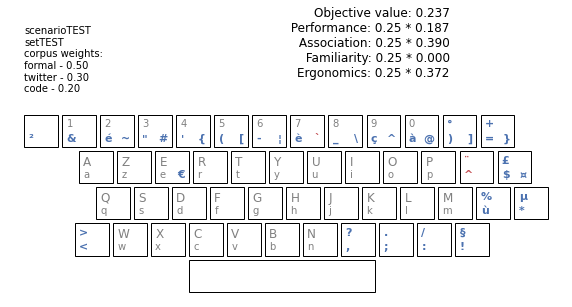

In [10]:
mapping = get_azerty()

# obtaining the costs of the mapping
objective, p, a, f, e = get_objectives(mapping, w_p, w_a, w_f, w_e, corpus_weights, quadratic=1)
print("\nAZERTY score: %f\n Performance: %f\n Association: %f\n Familiarity: %f\n Ergonomics: %f\n"%(objective, p, a, f, e))

# plotting the mapping
fig, ax, objective, p, a, f, e = plot_mapping(mapping, plotname="azerty.png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, corpus_weights=corpus_weights, quadratic=0)      


# Methods for modifying and comparing mappings
We provide a number of ways to compare mappings, modify an existing mapping and assess the impact of such changes on the objective scores. 

<code> plot_mapping_comparison(mapping1, mapping2, corpus_weights, w_p, w_a, w_f, w_e) </code>

Can be used to compare any two mappings. It plots the second mapping and a bar chart comparing how the objective scores changed between the first and the second mapping. 

<code> new_mapping((mapping, char1, char2, corpus_weights, w_p, w_a, w_f, w_e, plot) </code>

let's you directly swap two characters and plots the corresponding outcome with statistics about the differences.

With 

<code> change_characters(mapping, change_dict) </code>

You can directly re-assign characters in a mapping by defining a new assignment of characters to keyslots in form of a dictionary. This returns the corresponding new mapping. The method


In [ ]:
# Get a mapping from file and plot it
mapping = get_mapping("mappings/scenarioTESTsetTEST/scenarioTESTsetTEST_reform_constrained_R1_0.305010.txt")
_ = plot_mapping(mapping, plotname="azerty.png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, corpus_weights=corpus_weights, quadratic=0)      

# Swap two characters. 
# Automatically plots the new mapping and statistics on how the objective values changed, if option plot=True
new_mapping = swap_and_plot(mapping, u'É', u'@', corpus_weights, w_p, w_a, w_f, w_e, plot=True)

In [ ]:
# Change a given mapping 
change_dict = {u'É':'E00_Shift'}
new_mapping = change_characters(mapping, change_dict)
# Plot the new mapping and compare its objectives.
plot_mapping_comparison(mapping, new_mapping, corpus_weights, w_p, w_a, w_f, w_e)

# Adapt to your own scenario or language

The system uses the following input files from folder <code>/input</code>, which you can adapt for your own purpose. If you are renaming the files, you should change the path in <code>read_input.py</code>. For the new file, make sure to keep everything in the same format, in particular with respects to separators (mostly space, but please check). </i>

**The following files can easily be adapted for your own purpose, e.g. to optimize for a different set of special characters, to fix certain characters, or to change the reference keyboard (traditional azerty):**

<code>characters/characters_setFINAL.txt</code><br>
The list of special characters that should be optimally placed. 

<code>fixed/fixed_scenarioFINAL.txt</code><br>
A list of fixed characters (including special characters, a-z/A-Z and digits) and their position on the keyboard. 

<code>similarity.txt</code><br>
A list that defines the similarity between two special characters or for between a character-letter pair. The similarity is given between 0 and 1. This is a symmetric score and the value should only be filled once to ensure high performance. *Change this if you have added special characters in the characters file*

<code>frequencies/frequency_letters_XXX_XXX.txt</code><br>
Defines the (normalized) frequency of characters for a specific corpus and characterset. If you consider a different characterset, you need to adapt these and ensure that the frequencies sum up to 1 (best done computationally, see below).
*Change these if you have changed the character set or if you want to consider different corpora. The raw frequencies of all French characters are provided in input/resources* 

<code>frequencies/frequency_bigrams_XXX_XXX.txt</code><br>
Defines the (normalized) frequency of character pairs for a specific corpus and characterset.  If you consider a different characterset, you need to adapt these and ensure that the frequencies sum up to 1 (best done computationally, see below). 
*Change these if you have changed the character set or if you want to consider different corpora. The raw frequencies of all French characters are provided in input/resources* 



**These files usually do not need to be changed:**

<code>distance/distance_0.txt</code> and <code>distance/distance_1.txt</code><br>
Matrix that defines the distance between two keyslots as the sum of row and column distance (normalized between 0 and 1). An extra level cost (Shift, Alt, Alt+Shift) is taken into account in the familiarity score (distance_1.txt).

<code>performance/performance.txt</code><br>
Defines the performance of a transition between a letter key and a special character key. Note: in this form only valid for the keyboard layout of the French keyboard (see keyslots file below)

<code>ergonomics/ergonomics.txt</code><br>
Defines the ergonomics value of a transition between two keys. Note: in this form only valid for the keyboard layout of the French keyboard (see keyslots file below)

<code>keyslots/keyslots.txt </code><br>
A list of all free slots to which the characters can be assigned during optimization (including slots on which you want to fix characters). This file should only be changed if the structure of the keyboard changes. The French keyboard follows the <a href="https://en.wikipedia.org/wiki/ISO/IEC_9995#The_harmonized_48_graphic_key_keyboard_arrangement"> ISO/IEC 9995-2 </a> keyboard norm, specifically, the harmonized 48 graphic key keyboard arrangement including B00. 

<b> Important: </b> You can easily remove keyslots here if you do not want them to be assigned to special characters. However, if you want to add keyslots, you also have to provide the corresponding information about their performance and ergonomics in the respective files! 

<code>all_slots.txt</code><br>
Contains all keyboard slots. This is only relevant for plotting. 

<code>letters/letters.txt </code><br>
A list of letters that are fixed on the keyboard according to the previous layout (<code>azerty.txt</code>). Characters are optimized in relation to these fixed letters. 

<b> Important: </b> You can easily remove characters. However, if you want to add letters or change their assignment to other keyslots (as defined in the azerty.txt) you also need to update the corresponding information about performance, ergonomics, and similarity.

<code>azerty.txt </code><br>
</i>Defines the location of each character on the current (azerty) layout. Used in the familiarity objective.

In [ ]:
# Use the following method to create new frequency files from the available French coropora data. 
# You need to do that if you create a new characterset. 

create_normalized_frequency_files(scenario, char_set, glob.glob("input/resources/*letters*"), 
                                  glob.glob("input/resources/*bigrams*"))